In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import os
base_dir = "/media/gegen07/Expansion/data/mestrado/checkins_data/checkins_local"
file = os.path.join(base_dir, "/Users/vitor/Desktop/mestrado/ingred/data/checkins/Florida.csv")
data = pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/checkins/Florida.csv")

In [3]:
data.placeid.nunique()

74381

In [22]:
pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/output/florida_new/florida_new-embeddings.csv").head(200)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,category,placeid
0,26.891144,23.399624,14.183931,18.216562,-25.332026,-8.032208,-35.189516,-86.227892,41.665609,-7.691602,...,0.013751,2.583901,2.743433,3.875601,0.000000,19.862181,4.147935,0.000000,Travel,758476
1,2.018291,0.099658,-0.934865,1.778219,0.102803,-1.238827,-1.695285,-3.308440,0.651813,-1.461499,...,-0.002344,0.676511,0.531182,0.000000,0.214485,0.000000,0.000000,0.034381,Travel,1110153
2,1.186296,3.016224,2.038542,-1.417059,-3.750555,-2.957405,-1.145510,-2.679238,2.373104,2.543249,...,-0.003213,0.080090,0.054338,0.000000,0.000000,0.026235,0.000000,0.000847,Nightlife,116388
3,0.918769,-8.260804,0.415541,15.906477,3.927301,-5.381117,-16.162659,-17.975725,6.096391,3.404973,...,0.000356,1.539652,0.000000,0.803493,0.834515,0.734639,0.736096,0.912566,Entertainment,15365
4,-0.689333,-2.351275,0.818022,4.781287,2.411187,-3.365819,-3.609779,-3.870851,2.758141,-0.462121,...,0.001312,0.130268,0.000000,0.296882,0.008701,0.437074,0.022339,0.233551,Shopping,1132142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.002963,-3.471487,7.251132,4.742118,1.117002,-3.680672,-13.469053,-11.624502,8.411103,6.876871,...,0.001668,0.000000,0.000000,0.750596,4.762661,0.000000,0.515313,0.000000,Entertainment,28449
196,9.523638,-3.034089,10.351960,7.847016,3.356788,-5.498647,-23.142376,-20.259576,12.847590,11.665163,...,0.003563,0.000000,0.450665,2.316075,1.859833,2.124304,0.380102,0.440071,Outdoors,621746
197,5.951833,-2.925097,12.438365,6.303679,-5.033869,-5.602720,-18.848483,-16.786471,12.693477,14.120298,...,0.004217,0.000000,0.032343,1.780070,0.981149,0.498815,1.195277,0.835716,Outdoors,383666
198,15.180220,-8.283989,15.759676,12.845514,7.598631,-3.564073,-27.315245,-26.901712,18.167207,13.471435,...,0.005295,0.000000,0.000000,2.662590,5.259805,1.694331,1.613165,0.000000,Travel,28446


In [4]:
features = pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/output/florida_new/florida_new-embeddings.csv")

In [5]:
features

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,category,placeid
0,26.891144,23.399624,14.183931,18.216562,-25.332026,-8.032208,-35.189516,-86.227892,41.665609,-7.691602,...,0.013751,2.583901,2.743433,3.875601,0.000000,19.862181,4.147935,0.000000,Travel,758476
1,2.018291,0.099658,-0.934865,1.778219,0.102803,-1.238827,-1.695285,-3.308440,0.651813,-1.461499,...,-0.002344,0.676511,0.531182,0.000000,0.214485,0.000000,0.000000,0.034381,Travel,1110153
2,1.186296,3.016224,2.038542,-1.417059,-3.750555,-2.957405,-1.145510,-2.679238,2.373104,2.543249,...,-0.003213,0.080090,0.054338,0.000000,0.000000,0.026235,0.000000,0.000847,Nightlife,116388
3,0.918769,-8.260804,0.415541,15.906477,3.927301,-5.381117,-16.162659,-17.975725,6.096391,3.404973,...,0.000356,1.539652,0.000000,0.803493,0.834515,0.734639,0.736096,0.912566,Entertainment,15365
4,-0.689333,-2.351275,0.818022,4.781287,2.411187,-3.365819,-3.609779,-3.870851,2.758141,-0.462121,...,0.001312,0.130268,0.000000,0.296882,0.008701,0.437074,0.022339,0.233551,Shopping,1132142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71947,-2.067825,-0.929624,-0.132690,1.560743,-0.314489,1.053263,-1.452232,-2.644906,2.298165,0.526528,...,-0.002354,0.006916,0.000000,0.000000,0.000000,0.001374,0.352545,0.000000,Community,6413422
71948,-0.067667,0.164315,0.002678,0.163190,-0.260633,1.202877,0.528747,-0.320011,0.476788,-0.418965,...,-0.002608,0.033459,0.000000,0.000000,0.000311,0.000000,0.073611,0.000000,Outdoors,6880130
71949,-0.295048,0.036278,0.312819,0.508375,-0.180002,0.557209,0.396378,-0.475368,0.419599,-0.406982,...,-0.002759,0.005373,0.000000,0.000000,0.000000,0.005990,0.041316,0.000000,Food,6880106
71950,-2.521179,1.613095,0.528255,0.661675,-0.443178,-0.072489,-0.716074,-3.694798,1.827745,-0.025691,...,-0.003068,0.005341,0.000000,0.000000,0.000000,0.000000,0.406252,0.000000,Entertainment,4237652


In [20]:
features["category"].head(20)

0     6
1     6
2     3
3     1
4     5
5     1
6     1
7     0
8     0
9     1
10    6
11    4
12    4
13    4
14    0
15    0
16    4
17    6
18    4
19    4
Name: category, dtype: int8

In [ ]:
# 0 - Community
# 1 - Entertainment
# 2 - Food
# 3 - Nightlife
# 4 - Outdoors
# 5 - Shopping
# 6 - Travel

In [10]:
features["category"] = features["category"].astype("category").cat.codes
features["category"].unique()

array([6, 3, 1, 5, 0, 4, 2], dtype=int8)

In [11]:
soma_colunas = features.sum()
colunas_soma_zero = soma_colunas[soma_colunas.eq(0)]

numero_colunas_soma_zero = len(colunas_soma_zero)

print(numero_colunas_soma_zero)

0


In [12]:
features[features < 0] = 0

In [13]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,category,placeid
0,26.891144,23.399624,14.183931,18.216562,0.000000,0.0,0.0,0.0,41.665609,0.000000,...,0.013751,2.583901,2.743433,3.875601,0.000000,19.862181,4.147935,0.000000,6,758476
1,2.018291,0.099658,0.000000,1.778219,0.102803,0.0,0.0,0.0,0.651813,0.000000,...,0.000000,0.676511,0.531182,0.000000,0.214485,0.000000,0.000000,0.034381,6,1110153
2,1.186296,3.016224,2.038542,0.000000,0.000000,0.0,0.0,0.0,2.373104,2.543249,...,0.000000,0.080090,0.054338,0.000000,0.000000,0.026235,0.000000,0.000847,3,116388
3,0.918769,0.000000,0.415541,15.906477,3.927301,0.0,0.0,0.0,6.096391,3.404973,...,0.000356,1.539652,0.000000,0.803493,0.834515,0.734639,0.736096,0.912566,1,15365
4,0.000000,0.000000,0.818022,4.781287,2.411187,0.0,0.0,0.0,2.758141,0.000000,...,0.001312,0.130268,0.000000,0.296882,0.008701,0.437074,0.022339,0.233551,5,1132142


In [14]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:106], features.iloc[:,107])

In [15]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:, 0:106], features.iloc[:, 107])
fscores, precisions, recalls = [], [], []

acc = []
precision = []
recall = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

for train_index, test_index in split:
  
    X_train, Y_train = features.loc[train_index].iloc[:,
                                                        :106], features.loc[train_index].iloc[:, 107]
    x_test, y_test = features.loc[test_index].iloc[:,
                                                    :106], features.loc[test_index].iloc[:, 107]

    model = svm.SVC(
        kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)

    y_predicted = model.predict(x_test)
    
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))

    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)

    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(
        y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
    class_labels = sorted(set(y_test))


In [16]:
name_columns = [x for x in class_labels]
metrics_f = pd.DataFrame(fscores, columns = name_columns)
metrics_p = pd.DataFrame(precisions, columns = name_columns)
metrics_r = pd.DataFrame(recalls, columns = name_columns)

metrics_f["accuracy"] = acc
metrics_f["macro avg"] = m_avg_f
metrics_f["weighted avg"] = w_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r

print("Métricas precision:")
display(metrics_p)

print("Métricas recall:")
display(metrics_r)

print("Métricas fscore:")
display(metrics_f)

Métricas precision:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.209766,0.138686,0.471996,0.183645,0.134328,0.409138,0.236052,0.347457,0.254801
1,0.225033,0.149650,0.492912,0.177746,0.133176,0.390247,0.276744,0.353367,0.263644
2,0.204869,0.168831,0.492225,0.207843,0.133170,0.386518,0.257919,0.349599,0.264482
3,0.212372,0.138736,0.496614,0.167449,0.127399,0.401750,0.223529,0.350994,0.252550
4,0.204599,0.130000,0.493269,0.180451,0.121696,0.393962,0.234597,0.347660,0.251225


Métricas recall:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.178258,0.105205,0.196380,0.469027,0.210674,0.581599,0.119565,0.323952,0.265815
1,0.192155,0.122566,0.199207,0.413445,0.226908,0.575594,0.119000,0.319992,0.264125
2,0.208459,0.136682,0.204956,0.441667,0.194817,0.559557,0.115385,0.319875,0.265932
3,0.195193,0.110867,0.198511,0.370884,0.238285,0.568879,0.095190,0.317651,0.253973
4,0.200000,0.119540,0.203465,0.411664,0.192795,0.555132,0.104430,0.314593,0.255289


Métricas fscore:


,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,0.192733,0.119647,0.277361,0.263944,0.164054,0.480358,0.158730,0.323952,0.236690,0.308648
1,0.207298,0.134761,0.283741,0.248610,0.167843,0.465137,0.166434,0.319992,0.239118,0.306095
2,0.206649,0.151065,0.289407,0.282667,0.158200,0.457213,0.159441,0.319875,0.243520,0.306979
3,0.203421,0.123246,0.283642,0.230728,0.166030,0.470926,0.133521,0.317651,0.230216,0.305223
4,0.202273,0.124551,0.288096,0.250915,0.149209,0.460863,0.144526,0.314593,0.231490,0.303712


In [39]:
metrics_f.columns

Index([0, 1, 2, 3, 4, 5, 6, 'accuracy', 'macro avg', 'weighted avg'], dtype='object')

<Axes: xlabel='variable', ylabel='value'>

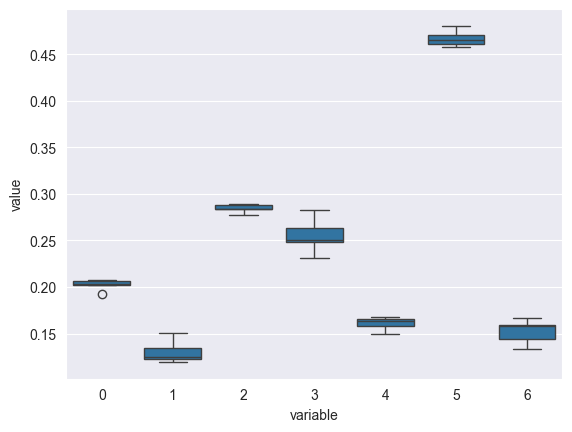

In [17]:
sns.boxplot(x="variable", y="value", data=metrics_f[[0, 1, 2, 3, 4, 5, 6]].melt())

In [18]:
#save the dataframes
metrics_f.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_f.csv")
metrics_p.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_p.csv")
metrics_r.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_r.csv")

,Category,F1-Score,F1-Variance,F1-Formatter,Precision,Precision-Variance,Precision-Formatter,Recall,Recall-Variance,Recall-Formatter,Support,F1-Deviation,Precision-Deviation,Recall-Deviation
0,Community,0.202475,0.005225,20.25 ± 0.52,0.211328,0.007461,21.13 ± 0.75,0.194813,0.009944,19.48 ± 0.99,1735.0,NaN,NaN,NaN
1,Entertainment,0.130654,0.011373,13.07 ± 1.14,0.145181,0.013368,14.52 ± 1.34,0.118972,0.010790,11.90 ± 1.08,870.0,NaN,NaN,NaN
2,Food,0.284449,0.004226,28.44 ± 0.42,0.489403,0.008834,48.94 ± 0.88,0.200504,0.003202,20.05 ± 0.32,4502.0,NaN,NaN,NaN
3,Nightlife,0.255373,0.017271,25.54 ± 1.73,0.183427,0.013361,18.34 ± 1.34,0.421337,0.032830,42.13 ± 3.28,583.0,NaN,NaN,NaN
4,Outdoors,0.161067,0.006757,16.11 ± 0.68,0.129954,0.004787,13.00 ± 0.48,0.212696,0.017757,21.27 ± 1.78,1027.0,NaN,NaN,NaN
5,Shopping,0.466899,0.008133,46.69 ± 0.81,0.396323,0.008152,39.63 ± 0.82,0.568152,0.009799,56.82 ± 0.98,4725.0,NaN,NaN,NaN
6,Travel,0.152530,0.011874,15.25 ± 1.19,0.245768,0.019084,24.58 ± 1.91,0.110714,0.009479,11.07 ± 0.95,948.0,NaN,NaN,NaN
7,macro avg,0.236207,NaN,NaN,0.257341,NaN,NaN,0.261027,NaN,NaN,NaN,0.004906,0.005613,0.005278


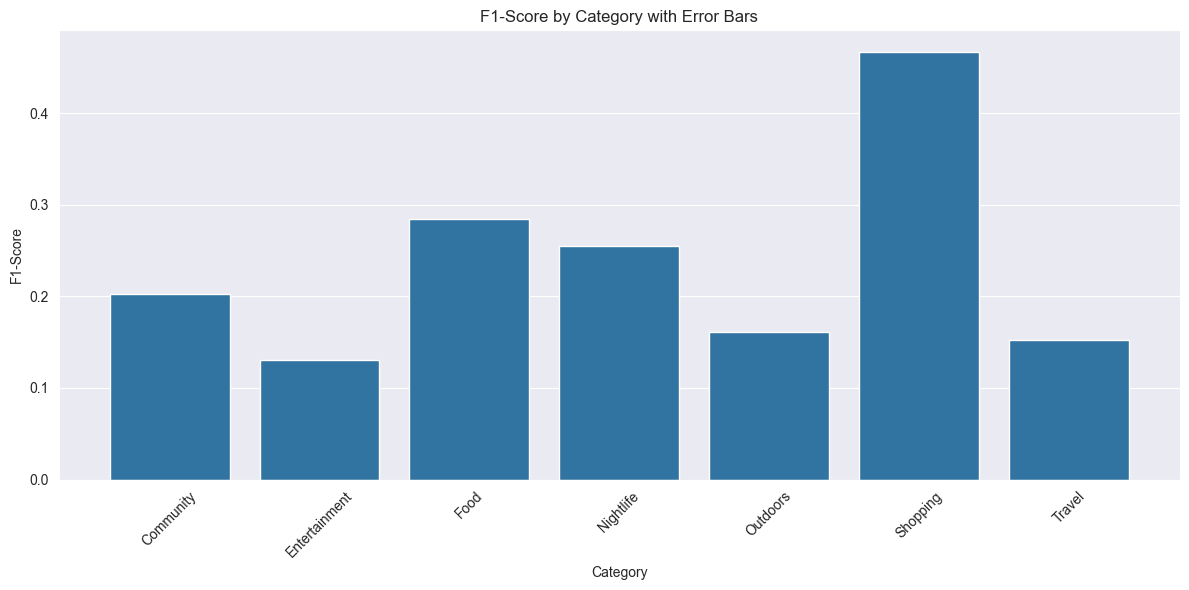

In [32]:
from matplotlib import pyplot as plt

# Calculate mean and variance of metrics for each category
# First create category mapping for readability
category_mapping = {
    0: "Community",
    1: "Entertainment",
    2: "Food",
    3: "Nightlife",
    4: "Outdoors",
    5: "Shopping",
    6: "Travel"
}

# Calculate the mean and variance for each category
summary_data = []

# Get support values (assuming they're the same across folds)
support_values = support if 'support' in locals() else None

# For each category/class
for i, category_id in enumerate(name_columns):
    if isinstance(category_id, int) and category_id in category_mapping:
        category_name = category_mapping[category_id]

        # Calculate means
        avg_f1 = np.mean(metrics_f[category_id])
        avg_precision = np.mean(metrics_p[category_id])
        avg_recall = np.mean(metrics_r[category_id])

        # Calculate variances
        var_f1 = np.std(metrics_f[category_id])
        var_precision = np.std(metrics_p[category_id])
        var_recall = np.std(metrics_r[category_id])

        # Get support if available, otherwise use None
        support_val = support_values[i] if support_values is not None else None

        summary_data.append({
            "Category": category_name,
            "F1-Score": avg_f1,
            "F1-Variance": var_f1,
            "F1-Formatter": f"{100*avg_f1:.2f} ± {100*var_f1:.2f}",
            "Precision": avg_precision,
            "Precision-Variance": var_precision,
            "Precision-Formatter": f"{100*avg_precision:.2f} ± {100*var_precision:.2f}",
            "Recall": avg_recall,
            "Recall-Variance": var_recall,
            "Recall-Formatter": f"{100*avg_recall:.2f} ± {100*var_recall:.2f}",
            "Support": support_val
        })

# Add macro average
summary_data.append({
    "Category": "macro avg",
    "F1-Score": np.mean(metrics_f["macro avg"]),
    "F1-Deviation": np.std(metrics_f["macro avg"]),
    "Precision": np.mean(metrics_p["macro avg"]),
    "Precision-Deviation": np.std(metrics_p["macro avg"]),
    "Recall": np.mean(metrics_r["macro avg"]),
    "Recall-Deviation": np.std(metrics_r["macro avg"]),
    "Support": None
})

# Create the summary dataframe
summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)

# Save the summary metrics
summary_df.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/summary_category_metrics_with_variance.csv", index=False)

# Create a visualization of the F1 scores with error bars showing variance
plt.figure(figsize=(12, 6))
categories = summary_df['Category'][:-1]  # Exclude macro avg
f1_scores = summary_df['F1-Score'][:-1]
f1_vars = summary_df['F1-Deviation'][:-1]
f1_errors = np.sqrt(f1_vars)  # Convert variance to std deviation for error bars

sns.barplot(x=categories, y=f1_scores)
plt.errorbar(x=range(len(categories)), y=f1_scores, yerr=f1_errors, fmt='none', color='black', capsize=5)
plt.title('F1-Score by Category with Error Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()